# MNIST Sign Language recognition

Die Daten stammen von einer [Kaggle Challenge](https://www.kaggle.com/datamunge/sign-language-mnist).

Das Ziel ist es, das amerikanische Fingeralphabet (ASL) zu erkennen.

## Fingeralphabet

![Illustration jedes Buchstaben in ASL](data/american_sign_language.PNG)

J und Z erfordern Bewegung um sich von I bzw D zu unterscheiden.

## Datenquelle

![Beispiele für Rohdaten](data/amer_sign2.png)

Die Daten basieren auf Fotos wie diesen. Deswegen sind Bewegungsabhängige Buchstaben nicht enthalten.

## Datensatz

![Beispiele für Daten](data/amer_sign3.png)

Die tatsächlichen Daten ähneln MNIST stark.

- Bildgröße 28x28
- Einfärbig

Es wurden bereits Transformationen auf den Quelldaten angewandt, um 27.455 Trainingsbilder und 7172 Testbilder zu erstellen.

# Datenanalyse

Wir sehen uns den Datensatz in Python genauer an.

In [1]:
# import general utilities
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
# import cv2
# import imutils
from sklearn.preprocessing import LabelBinarizer

In [2]:
# read the data
X_train = pd.read_csv("data/sign_mnist_train.csv")
X_test = pd.read_csv("data/sign_mnist_test.csv")

X_train

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27450,13,189,189,190,190,192,193,193,193,193,...,132,165,99,77,52,200,234,200,222,225
27451,23,151,154,157,158,160,161,163,164,166,...,198,198,198,198,198,196,195,195,195,194
27452,18,174,174,174,174,174,175,175,174,173,...,121,196,209,208,206,204,203,202,200,200
27453,17,177,181,184,185,187,189,190,191,191,...,119,56,27,58,102,79,47,64,87,93


Es gibt ein Label und 784 (= 28 x 28) Pixel mit Werten von 0 bis 255.

## Verteilung der Klassen

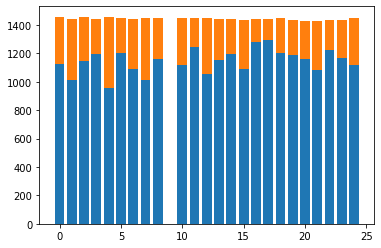

In [3]:
label_counts = X_train['label'].value_counts().sort_index()
label_counts_test = X_test['label'].value_counts().sort_index()

plt.bar(x = label_counts.keys(), height = label_counts.values, label = 'train')
plt.bar(x = label_counts.keys(), height = label_counts_test.values, bottom = label_counts.values, label = 'test')
plt.show()

Die 10te und die 26te Klassen, J und Z, fehlen wie erwartet.

## Verteilung der Training-Labels als Boxplot

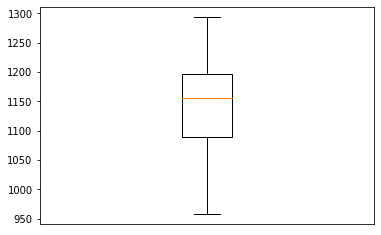

In [4]:
plt.boxplot(label_counts.values)
plt.xticks([])
plt.show()

## Verteilung der Test-Labels als Boxplot

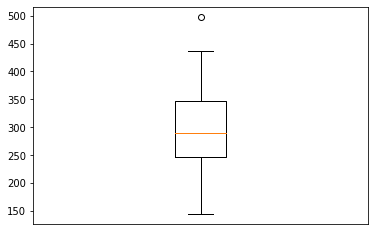

In [5]:
plt.boxplot(label_counts_test.values)
plt.xticks([])
plt.show()

# Datenvorbereitung

Wir passen die Daten für das Training an.

## Label aufbereiten

In [6]:
# separate labels
y_train = X_train.pop('label')
y_test = X_test.pop('label')

print(f'Anzahl an Labels: Training {len(y_train):,} vs. Test {len(y_test):,}')

Anzahl an Labels: Training 27,455 vs. Test 7,172


In [7]:
# label is category
label_binarizer = LabelBinarizer()
label_binarizer.fit(y_train)
label_binarizer.fit(y_test)
y_train = label_binarizer.transform(y_train)
y_test = label_binarizer.transform(y_test)

y_train[0]

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

Die Labels sind jetzt als One-Hot-Vektoren gestaltet.

## Pixel skalieren

In [8]:
# values are 0-255 right now, scale them to 0.0-1.0 instead
X_train = X_train.divide(255)
X_test = X_test.divide(255)

In [9]:
X_train.iloc[0,].describe()

count    784.000000
mean       0.610914
std        0.137471
min        0.164706
25%        0.537255
50%        0.643137
75%        0.705882
max        0.811765
Name: 0, dtype: float64

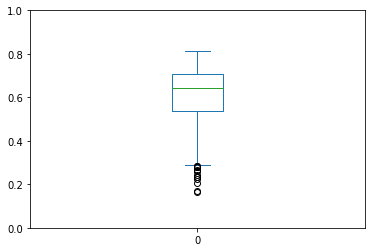

In [10]:
X_train.iloc[0,].plot.box()
plt.ylim(0,1)
plt.show()

## Graphische Darstellung

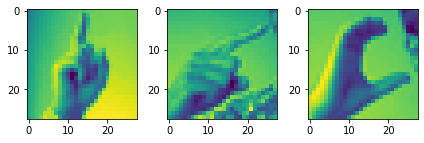

In [11]:
fig, ax = plt.subplots(1, 3)
ax[0].imshow(X_train.iloc[0,].to_numpy().reshape(28,28))
ax[1].imshow(X_train.iloc[1,].to_numpy().reshape(28,28))
ax[2].imshow(X_train.iloc[2,].to_numpy().reshape(28,28))
plt.tight_layout()
plt.show()

# MLP Classifier

In [12]:
from sklearn.neural_network import MLPClassifier

# first attempt with default params but few iterations
clf = MLPClassifier(random_state=1, max_iter=100).fit(X_train, y_train)

/home/admini/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


In [13]:
print(f"Accuracy: {clf.score(X_test, y_test):.2f}")
print(f"Loss ({clf.loss}): {clf.loss_:.5f}")

Accuracy: 0.59
Loss (log_loss): 0.01926


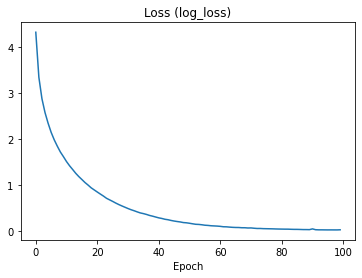

In [14]:
import matplotlib.pyplot as plt

plt.plot(clf.loss_curve_)
plt.title(f"Loss ({clf.loss})")
plt.xlabel("Epoch")
plt.show()

In [16]:
def plot_confusion_matrix(y_test, y_pred):
    labels = ['a','b','c','d','e','f','g','h','i','k','l','m','n','o','p','q','r','s','t','u','v','w','x','y']
    y_test_abc = [np.argmax(y) for y in y_test]
    y_pred_abc = [np.argmax(y) for y in y_pred]

    from sklearn.metrics import confusion_matrix
    cn = confusion_matrix(y_test_abc, y_pred_abc)

    import seaborn as sns
    ax = sns.heatmap(data = cn,
                     annot = True,
                     fmt = 'g',
                     xticklabels = labels,
                     yticklabels = labels)

    ax.set(xlabel = 'Predicted', ylabel = 'Ground Truth')

    import matplotlib.pyplot as plt
    fig = plt.gcf()
    fig.set_size_inches(10,7)
    plt.close(fig) # do not show automatically
    return fig

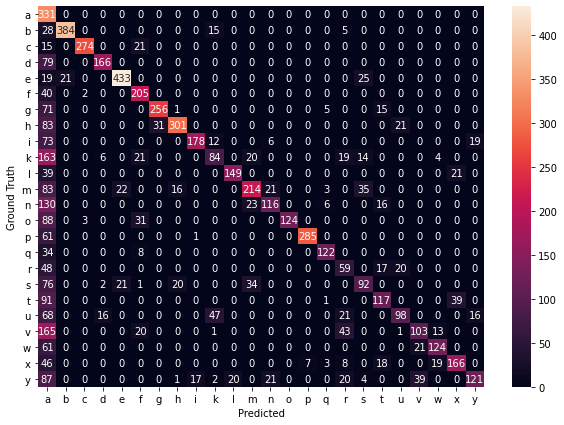

In [17]:
y_pred = clf.predict(X_test)
plot_confusion_matrix(y_test, y_pred)